# Bitcoin Alpha network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import igraph as ig
import dionysus as d

In [3]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = 10, 6

## Data import

In [4]:
G = ig.read("data/bitcoin/bitcoinalpha.graphml")

In [5]:
G.to_undirected(combine_edges="first")

In [6]:
G.summary()

'IGRAPH U-W- 3783 14124 -- \n+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)'

## Weight rank clique filtration and persistent homology

In [7]:
from filtration import wrcf

In [8]:
def get_diagram(graph, weight="weight"):
    filt = wrcf(graph, weight=weight)
    pers = d.homology_persistence(filt)
    return(d.init_diagrams(pers, filt))

In [9]:
np.unique(G.es["rating"])[::-1]

array([ 10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,  -1.,
        -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10.])

In [10]:
dgms = get_diagram(G, weight="rating")

In [11]:
dgms

[Diagram with 3783 points,
 Diagram with 29472 points,
 Diagram with 1410 points,
 Diagram with 175 points,
 Diagram with 10 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points,
 Diagram with 0 points]

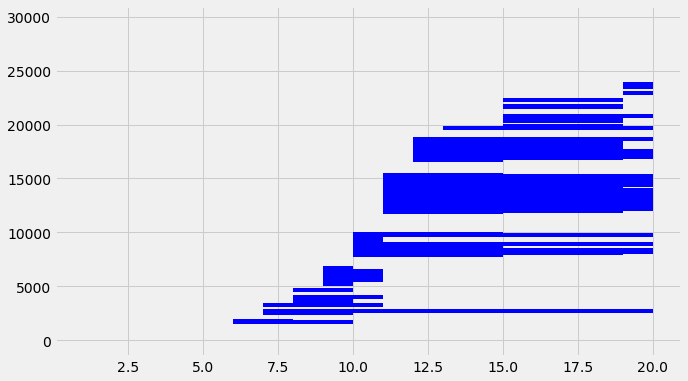

In [12]:
d.plot.plot_bars(dgms[1])

## Normalize the time scale

In [10]:
time_min = min(G.es["time"])
time_max = max(G.es["time"])
time_min, time_max

(1289192400.0, 1453438800.0)

In [11]:
G.es["time"] = (np.array(G.es["time"]) - time_min) / (time_max - time_min)

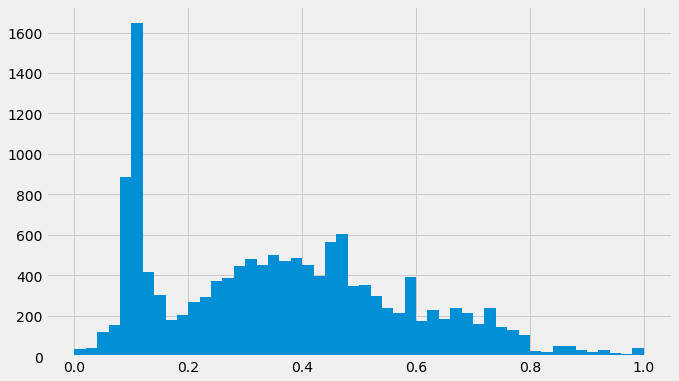

In [12]:
plt.hist(G.es["time"], bins=50);

## Discretize the time scale using non-overlapping windows

In [69]:
N = 8 # Number of windows

In [70]:
subgs = list(range(N))
for i in range(N):
    subgs[i] = G.subgraph_edges(G.es(lambda e: (e["time"] < (i+1)/N) & (e["time"] > i/N)))

In [71]:
G.summary()

'IGRAPH U-W- 3783 14124 -- \n+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)'

In [72]:
for g in subgs:
    print(g.summary())

IGRAPH U-W- 1203 3017 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 779 1714 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 999 2820 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 1201 2959 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 776 1721 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 562 1285 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 231 447 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)
IGRAPH U-W- 95 155 -- 
+ attr: id (v), label (v), Edge Label (e), id (e), rating (e), time (e), weight (e)


## Apply persistent homology to each window

In [73]:
from dask.distributed import Client

In [74]:
client = Client(processes=False)

In [75]:
dgms = client.map(get_diagram, subgs)

In [90]:
client.ncores()

{'inproc://129.67.184.177/6482/23': 32}

In [76]:
dgms = client.gather(dgms)
dgms

[[Diagram with 1203 points,
  Diagram with 945 points,
  Diagram with 8 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 779 points,
  Diagram with 399 points,
  Diagram with 7 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 999 points,
  Diagram with 628 points,
  Diagram with 107 points,
  Diagram with 0 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 1201 points,
  Diagram with 647 points,
  Diagram with 27 points,
  Diagram with 1 points,
  Diagram with 0 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 776 points,
  Diagram with 372 points,
  Diagram with 16 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 562 points,
  Diagram with 189 points,
  Diagram with 11 points,
  Diagram with 0 points,
  Diagram with 0 points,
  Diagram with 0 points,
  Diagram with 0 points],
 [Diagram with 231 points,
  Diagram with 111 points,
  Diagram with 0 points,
  Diagram

In [86]:
ig.plot(subgs[0])

TypeError: plotting not available